In [30]:
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

In [28]:
data = pd.read_csv('bbc_text_cls.csv')
X  = data["text"]
y= data['labels']
data.head(5)

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


<Axes: xlabel='labels', ylabel='count'>

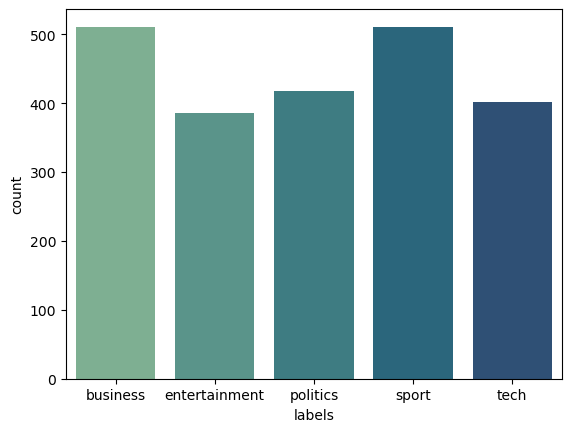

In [27]:
sns.countplot(data,x=y,palette='crest',hue='labels')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [39]:
# Using bag of words approch to convert the text into numberical value 
vectorizer = CountVectorizer()
X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)
X_train_vector = X_train_vector.toarray()


In [41]:

table = pd.DataFrame(data=X_train_vector,columns=vectorizer.get_feature_names_out())
table

,00,000,0001,000m,000th,001,001and,001st,004,0051,...,zone,zonealarm,zones,zooms,zornotza,zubair,zuluaga,zurich,zutons,zvonareva
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
clf = MultinomialNB()
clf.fit(X_train_vector,y_train)
y_pred = clf.predict(X_test_vector)


In [59]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

               precision    recall  f1-score   support

     business       0.98      0.96      0.97       185
entertainment       0.99      0.97      0.98       129
     politics       0.96      0.98      0.97       131
        sport       1.00      0.99      1.00       155
         tech       0.96      0.99      0.97       135

     accuracy                           0.98       735
    macro avg       0.98      0.98      0.98       735
 weighted avg       0.98      0.98      0.98       735

[[177   0   4   0   4]
 [  1 125   2   0   1]
 [  2   0 128   0   1]
 [  1   0   0 154   0]
 [  0   1   0   0 134]]


In [60]:
clf.score(X_test_vector,y_test)

0.9768707482993197

In [61]:
# Now remove stop words 
vectorizer2 = CountVectorizer(stop_words='english')
X_train_remove_stopwords = vectorizer2.fit_transform(X_train)
X_test_remove_stopwords = vectorizer2.transform(X_test)


clf = MultinomialNB()
clf.fit(X_train_remove_stopwords,y_train)
y_pred = clf.predict(X_test_remove_stopwords)
# X_test_remove_stopwords.toarray()
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))



               precision    recall  f1-score   support

     business       0.98      0.96      0.97       185
entertainment       0.99      0.97      0.98       129
     politics       0.96      0.98      0.97       131
        sport       1.00      0.99      1.00       155
         tech       0.96      0.99      0.97       135

     accuracy                           0.98       735
    macro avg       0.98      0.98      0.98       735
 weighted avg       0.98      0.98      0.98       735

[[177   0   4   0   4]
 [  1 125   2   0   1]
 [  2   0 128   0   1]
 [  1   0   0 154   0]
 [  0   1   0   0 134]]
